Dataset download : https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

### It has 3 parts : 
### 1. EDA ,  2. Geopandas ,  3. Time Series Analysis ( using fbprophet)

###### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt    # time series

##### geopandas pkg

In [2]:
import geopandas as gpd                                # distribution per continet to map data
from shapely.geometry import Point, Polygon
import descartes

##### Dataset

In [3]:
df = pd.read_csv("D:/Data/covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


## ------------------------------------

## 1. EDA

##### Cleaning of dataset

In [4]:
# remove '\n' from columns names

df.columns.str.replace(r'\n', '', regex=True)    # replace '\n' with ''

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [5]:
# rename of columns

df.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'}, inplace=True)

In [6]:
df.shape
# df.dtypes

(20200, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20200 entries, 0 to 20199
Data columns (total 8 columns):
Province_State    14900 non-null object
Country_Region    20200 non-null object
Lat               20200 non-null float64
Long              20200 non-null float64
Date              20200 non-null object
Confirmed         20200 non-null int64
Deaths            20200 non-null int64
Recovered         20200 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()
df.isna().sum()         # both are same

# see : Province_State column has NaN values

Province_State    5300
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [9]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,20200.000000,20200.000000,20200.00000,20200.000000,20200.000000
mean,34.333044,-39.653802,141.19495,4.325495,49.108218
std,16.674665,81.589833,2469.59192,95.369259,1080.792309
min,-41.454500,-157.858400,0.00000,0.000000,0.000000
25%,31.766950,-96.004525,0.00000,0.000000,0.000000
50%,38.774750,-77.063950,0.00000,0.000000,0.000000
75%,42.424075,18.045600,0.00000,0.000000,0.000000
max,64.963100,174.886000,67773.00000,3046.000000,49134.000000


### Number  of Cases per day / Date

In [31]:
df_per_day = df.groupby('Date')['Confirmed','Deaths', 'Recovered'].sum()            # sum()
# df_per_day.head()

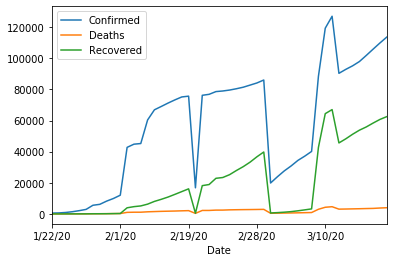

In [13]:
df_per_day.plot(kind='line')

In [14]:
df_per_day = df.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()        # max()
df_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


##### idxmax()

In [15]:
# df_per_day.describe()
# df_per_day['Confirmed'].max()
# df_per_day['Confirmed'].min()

df_per_day['Confirmed'].idxmax()      # gives date particular for max cases

'3/11/20'

#### Number of cases per Country

In [16]:
# groupby() - Country_Region or Province_state accordingly

df_country = df.groupby('Country_Region')['Confirmed','Deaths', 'Recovered'].max()
df_country.head()

,Confirmed,Deaths,Recovered
Country_Region,,,
Afghanistan,7,0,0
Albania,12,1,0
Algeria,20,0,0
Andorra,1,0,0
Argentina,19,1,0


#### Number of cases  [ ' Province_State ', ' Country_Region ' ]

In [21]:
df_country_state = df.groupby(['Province_State','Country_Region'])['Confirmed','Deaths', 'Recovered'].max()
df_country_state.head()

,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
"Adams, IN",US,1,0,0
"Alachua, FL",US,1,0,0
"Alameda County, CA",US,5,0,0
Alaska,US,0,0,0
Alberta,Canada,19,0,0


### Plot acc. to number of cases in Country

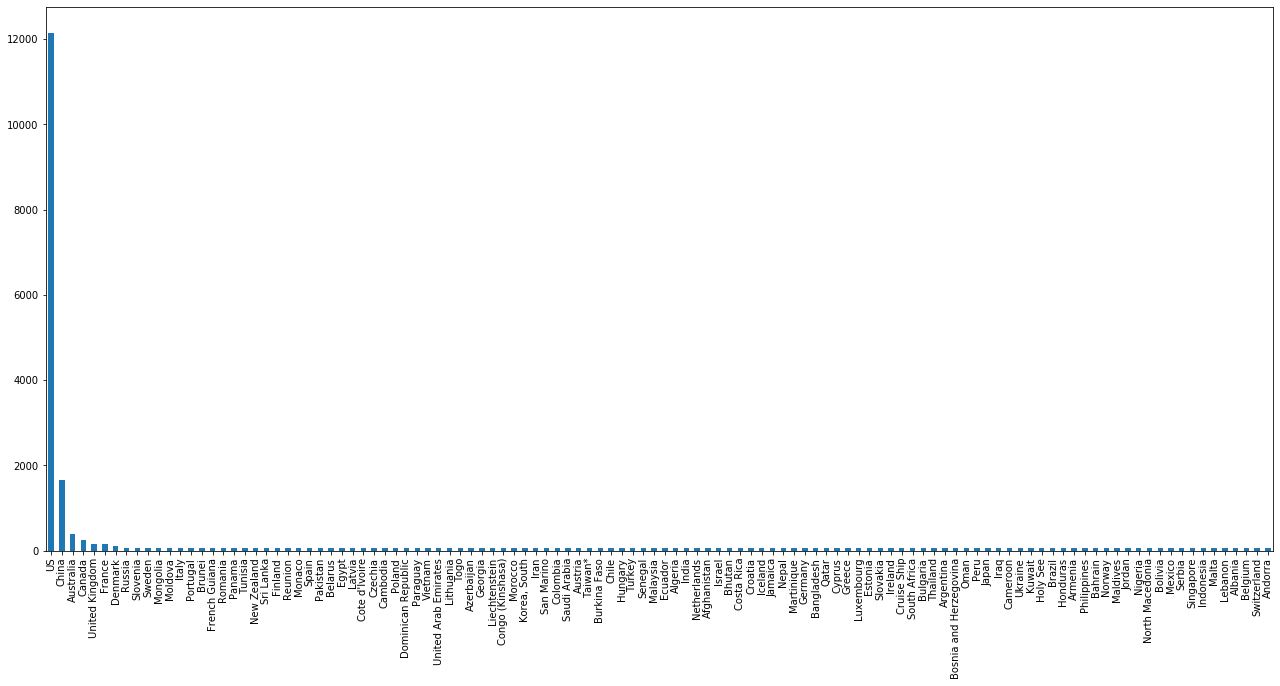

In [22]:
df['Country_Region'].value_counts().plot(kind='bar', figsize=(22,10))

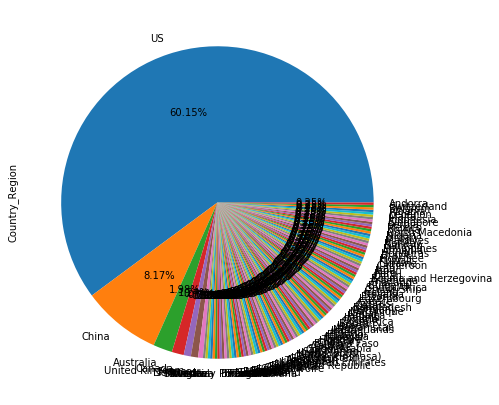

In [23]:
df['Country_Region'].value_counts().plot(kind='pie', figsize=(7,20), autopct='%1.2f%%')

In [24]:
# Number of Countries affected

# df['Country_Region'].unique() 

len(df['Country_Region'].unique())

114

## ----------------------------------------------

## 2. GeoPandas
### Check for Distribution on map
##### -> 1.Convert data to geodataframe
##### -> 2.get Geometry / Point  from (   Lat. / Long. ) 

In [117]:
# dir(gpd)

In [132]:
# 1.Convert data to geodataframe  and get geometry point from lat. / long.

gdf1 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Long'], df['Lat']))       # point = Long , Lat
gdf1.head()          # gdf1

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)


In [133]:
type(gdf1)        # Now its geodataframe

geopandas.geodataframe.GeoDataFrame

#### Method 2 :  We can also use like : 1.get  Lat. / Long.  points , 2. convert into geodataframe

In [140]:
points = [Point(x,y) for x,y in zip(df['Long'], df['Lat'])]   # point = Long , Lat

In [141]:
gdf2 = gpd.GeoDataFrame(df, geometry=points)                            # gdf2
gdf2.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)


#### Plotting gdf1 (lat / long) points

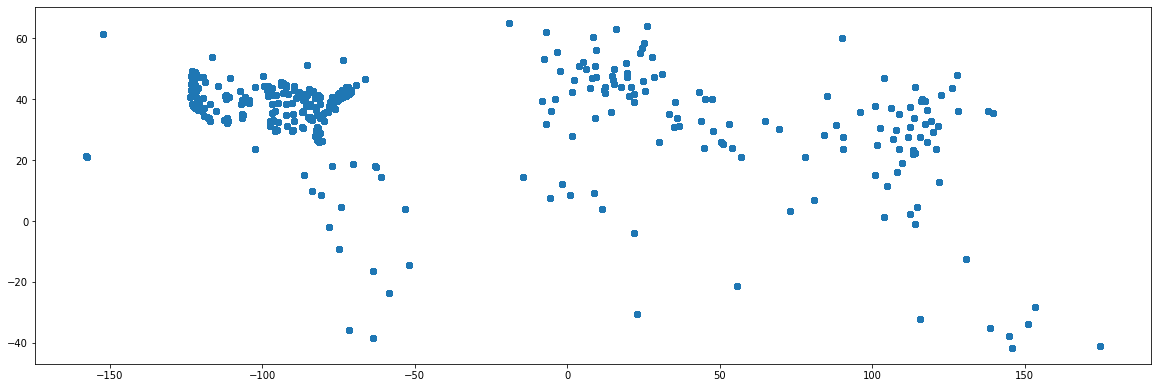

In [142]:
gdf1.plot(figsize=(20,20))

#### Overlapping with  " World map "  these ' Lat / Long ' points

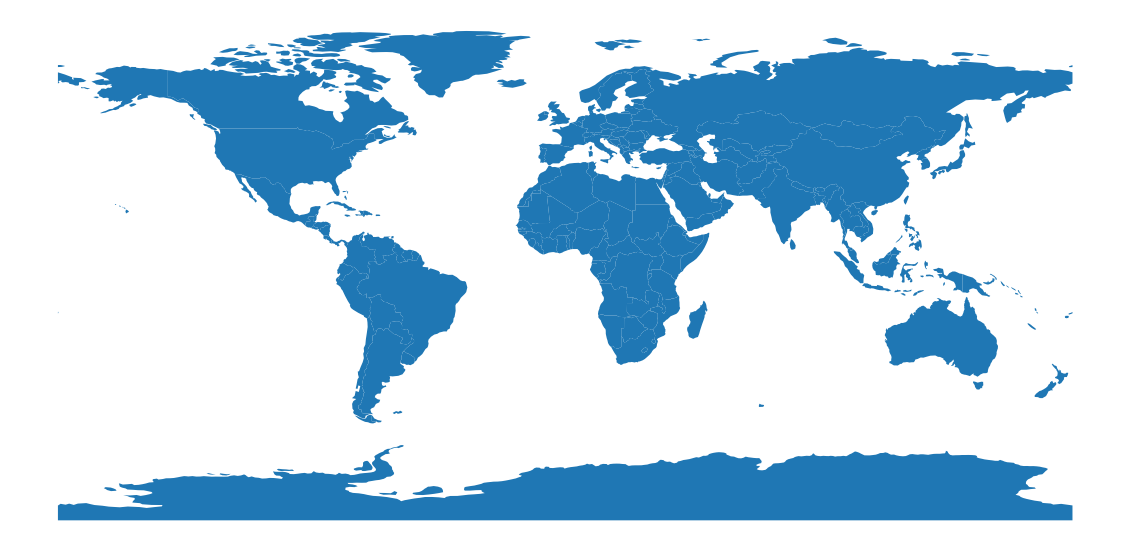

In [162]:
# 1. download the world map , 2. Overlap the map.

world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))    # download world_map dataset
ax = world_map.plot(figsize=(20,10))    # plot

ax.axis('off')                         # remove the axis
plt.show()

In [145]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

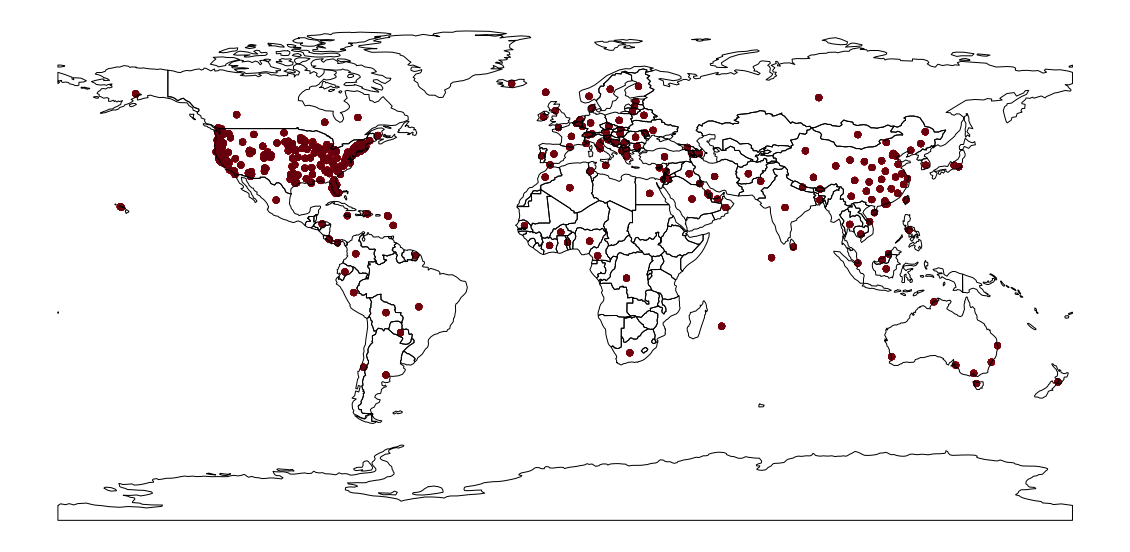

In [177]:
# 2.Overlap it

fig,ax = plt.subplots(figsize=(20,10))

gdf1.plot(cmap='Reds', ax=ax)    # gives lat/long of gdf1 with cmap=Reds

world_map.geometry.boundary.plot(color=None, edgecolor='k', linewidth=1, ax=ax)    # boundary using only

ax.axis('off')
plt.show()


# remove 'boundary' then use color
# world_map.geometry.plot(color=Green, edgecolor='k', linewidth=1, ax=ax)    # boundary using only

#### we can also get world_map dataset per country (or continent)

In [180]:
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [181]:
world_map['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

#### Asia

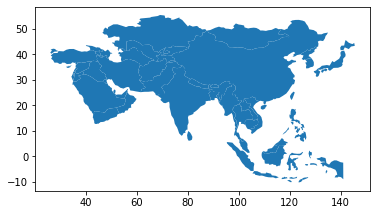

In [216]:
asia = world_map[world_map['continent']== 'Asia']        # map dataset
# asia.head()
asia.plot()

#### Europe

In [219]:
europe = world_map[world_map['continent']== 'Europe']
# europe.plot(figsize=(20,10))

#### We have converted our 'df' into 'gdf1' geodataframe , so we can get ( Lat / Long) from it for every country

### India

In [217]:
india_gdf = gdf1[gdf1['Country_Region'] == 'India']             # get India geo dataframe

In [241]:
# india_gdf

(20.06836197274608, 151.5181265403292, -13.647249362851532, 58.67251203066709)

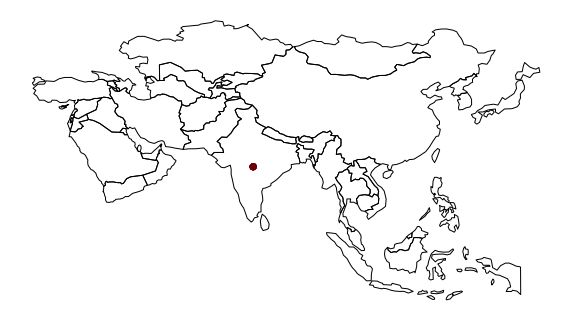

In [223]:
fig,ax = plt.subplots(figsize=(10,10))                                                 # Plot Deaths

india_gdf.plot(cmap='Reds', ax=ax)    # gives lat/long of gdf1 with cmap=Reds

asia.geometry.boundary.plot(color=None, edgecolor='k', linewidth=1, ax=ax)     # asia map

ax.axis('off')

### China

(20.068361972746047, 151.5181265403292, -13.647249362851529, 58.6725120306671)

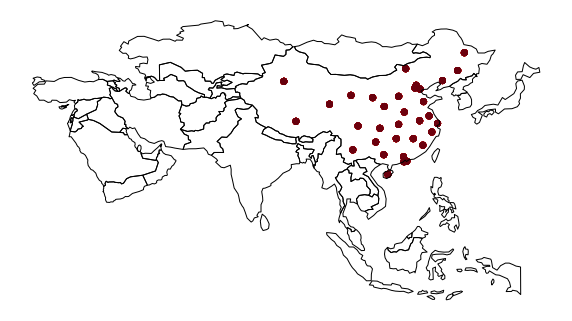

In [224]:
china_gdf = gdf1[gdf1['Country_Region'] == 'China']             # get China geo dataframe

fig,ax = plt.subplots(figsize=(10,10)) 

china_gdf.plot(cmap='Reds', ax=ax)    # gives lat/long of gdf1 with cmap=Reds

asia.geometry.boundary.plot(color=None, edgecolor='k', linewidth=1, ax=ax)     # asia map

ax.axis('off')

### US

In [232]:
north_america = world_map[world_map['continent']== 'North America']      # get map dataset 
south_america = world_map[world_map['continent']== 'South America']

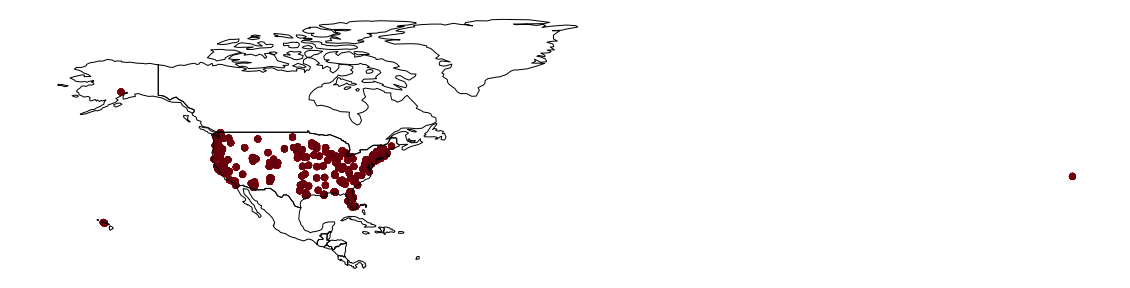

In [239]:
us_gdf = gdf1[gdf1['Country_Region'] == 'US']             # get China geo dataframe

fig,ax = plt.subplots(figsize=(20,20)) 

us_gdf.plot(cmap='Reds', ax=ax)    # gives lat/long of gdf1 with cmap=Reds

north_america.geometry.boundary.plot(color=None, edgecolor='k', linewidth=1, ax=ax)     # asia map

ax.axis('off')
plt.show()

## ---------------------------------------

### 3. Time Series Analysis

In [260]:
# df.head()
# df_per_day.head()

In [255]:
# create new column for 'Date' for time series format

df1 = df   # creating copy

In [256]:
df1['date_series'] = pd.to_datetime(df1['Date'])

In [259]:
df1.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
geometry                geometry
date_series       datetime64[ns]
dtype: object

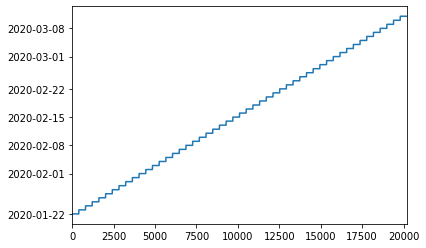

In [261]:
df1['date_series'].plot()

In [262]:
ts = df1.set_index('date_series')               # created 'ts'  dataframe and set as index 'date_series' column
ts.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
date_series,,,,,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
2020-01-22,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2020-01-22,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
2020-01-22,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
2020-01-22,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)


In [267]:
# selecting only for particular month

jan = ts.loc['2020-01']    # January

feb = ts.loc['2020-02']    # february

mar = ts.loc['2020-03']    # March

In [ ]:
# jan

In [277]:
last2_day = ts.loc['2020-03-10' : '2020-03-11']    # March last 2 days

In [279]:
single_day = ts.loc['2020-03-11']

##### Now we get last days goes from ' 10-11 March '  with [ 'Confirmed' , 'Recovered' , 'Deaths']

In [317]:
last = ts.loc['2020-03-10' : '2020-03-11'][['Confirmed', 'Recovered', 'Deaths']]

##### Plot last day

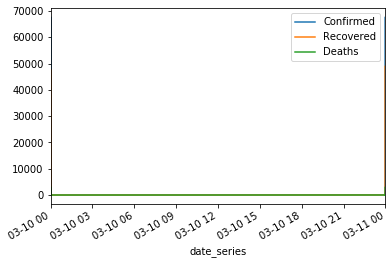

In [320]:
last.plot()

#### Plot March Month

In [341]:
march = ts.loc['2020-03'][['Confirmed' , 'Recovered' , 'Deaths']]

In [344]:
# march
# march.reset_index(drop=None)

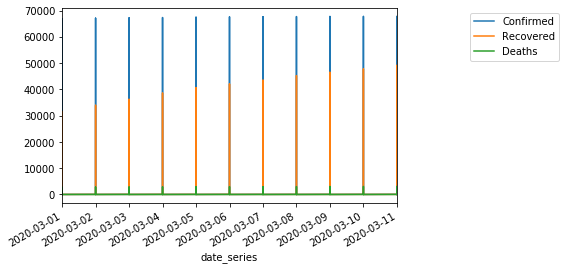

In [345]:
march.plot(kind='line')
plt.legend(bbox_to_anchor=(.5,.5,1,.5))

## -------------

In [321]:
df_by_date = ts.groupby(['date_series']).sum().reset_index(drop=None)

In [323]:
df_by_date.head()     # by date

,date_series,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,13870.5499,-16020.1362,555,17,28
1,2020-01-23,13870.5499,-16020.1362,653,18,30
2,2020-01-24,13870.5499,-16020.1362,941,26,36
3,2020-01-25,13870.5499,-16020.1362,1434,42,39
4,2020-01-26,13870.5499,-16020.1362,2118,56,52


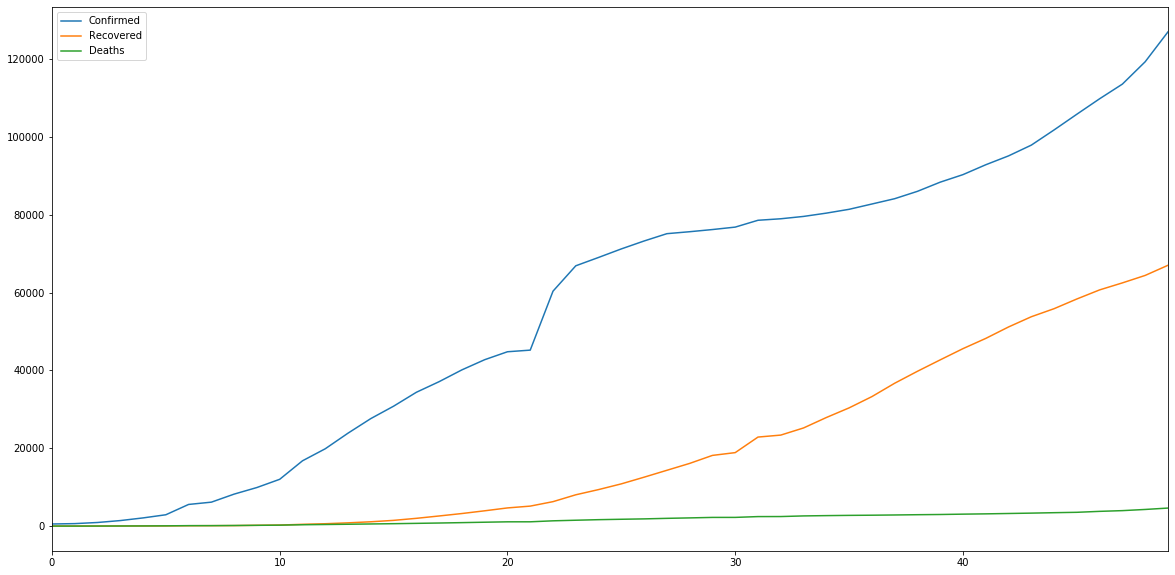

In [336]:
df_by_date[['Confirmed' , 'Recovered' , 'Deaths']].plot(kind='line',figsize=(20,10))

## ---------------------------

In [ ]:
# 1st install pystan then fbprophet

# conda install -c conda-forge pystan                    # pip install pystan fbprophet                 
# conda install -c conda-forge fbprophet          

### Time series analysis  using - fbprophet 

In [27]:
import fbprophet
from fbprophet import Prophet

# dir(fbprophet)

In [28]:
m = Prophet()         # initialize the model

In [29]:
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

##### Split dataset into 2 'confirmed' and 'Recovered'

In [34]:
# df_per_day.head()                         # Its of sum()

In [35]:
global_cases = df_per_day.reset_index()
global_cases.head()

,Date,Confirmed,Deaths,Recovered
0,1/22/20,555,17,28
1,1/23/20,653,18,30
2,1/24/20,941,26,36
3,1/25/20,1434,42,39
4,1/26/20,2118,56,52


In [36]:
confirmed_cases = global_cases[['Date','Confirmed']]
recovered_cases = global_cases[['Date','Recovered']]

In [38]:
confirmed_cases.shape         # split into (40 - 10)

(50, 2)

#### Dataframe Model asks column with "ds" and "y"  value , so we rename it. 

In [47]:
confirmed_cases.rename(columns={"Date":"ds", "Confirmed":"y"}, inplace=True)

In [48]:
train = confirmed_cases[:40]
test = confirmed_cases[40:]

In [50]:
# fit model 'train'
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
# Lets create future dates, it adds (create) 15 more days to 'train'

future_dates = m.make_future_dataframe(periods=15)    # 15 days
# future_dates

In [54]:
# Prediction

prediction = m.predict(future_dates)

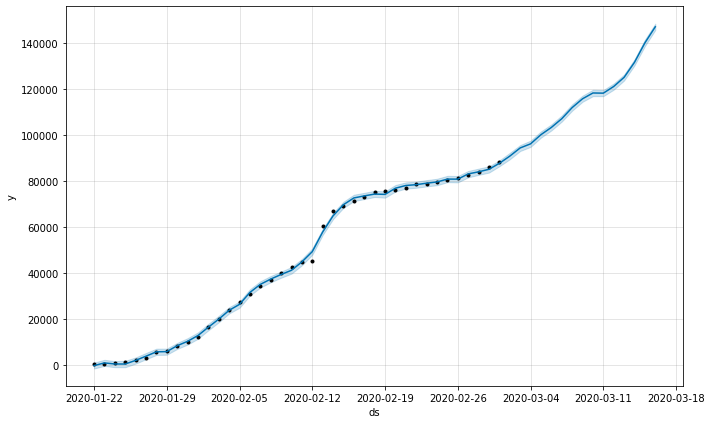

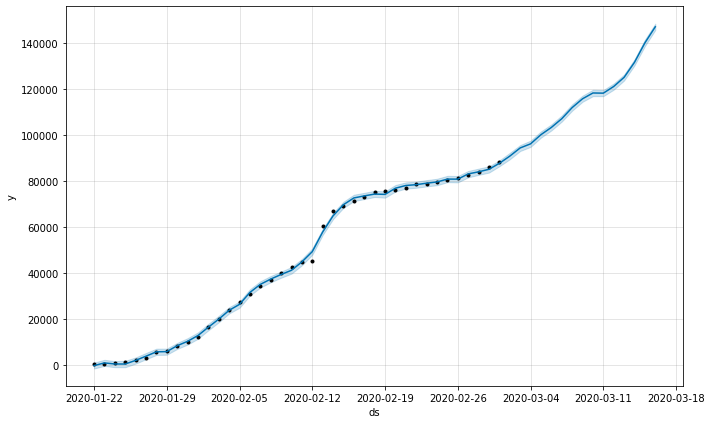

In [57]:
m.plot(prediction)

# Black dots are actual datapoints, darkblue is prediction and lightblue is border

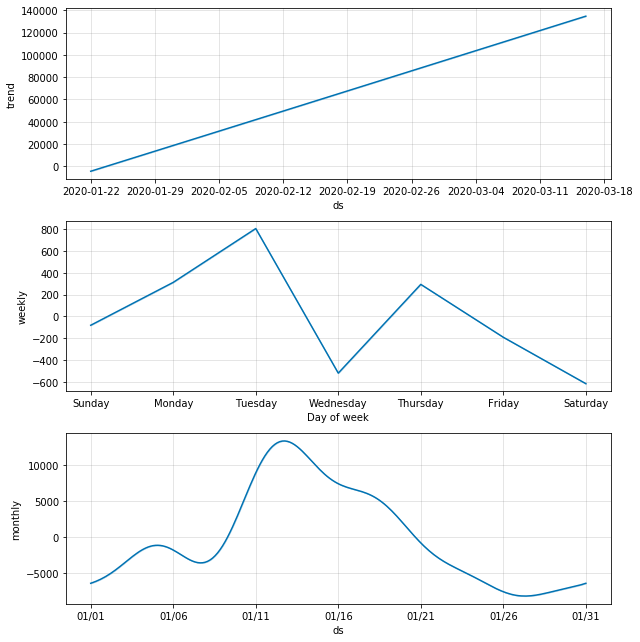

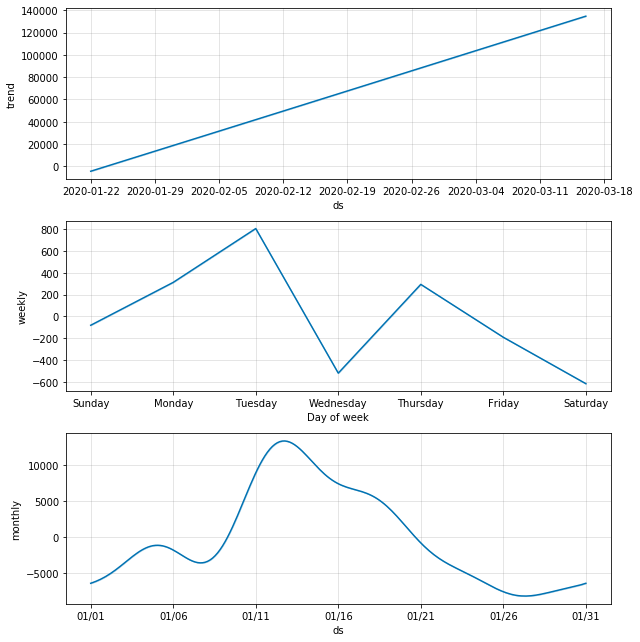

In [58]:
m.plot_components(prediction)

In [60]:
# We have dates 10,11 march above in 'ds' column of 'test' , so change it. 

test['dates'] = pd.to_datetime(test['ds'])

test = test.set_index('dates')

In [62]:
test = test['y']

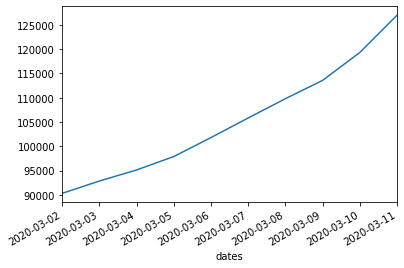

In [64]:
import matplotlib.pyplot as plt

test.plot()

#### find Point / Dates for Change

In [66]:
from fbprophet.plot import add_changepoints_to_plot

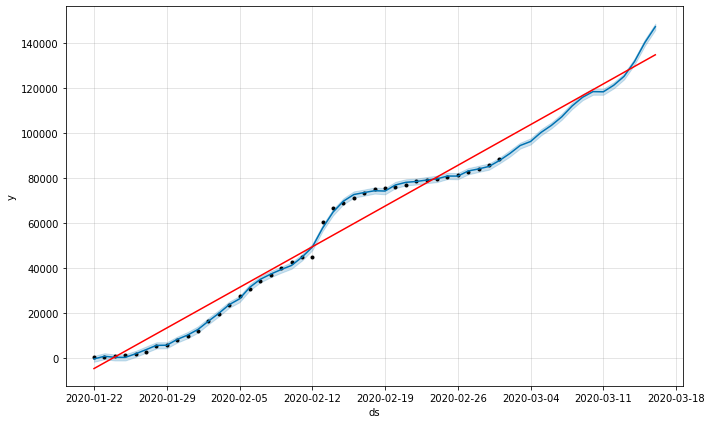

In [67]:
fig = m.plot(prediction)

x = add_changepoints_to_plot(fig.gca(), m, prediction)